In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures




In [2]:
data = pd.read_csv(r"C:\Users\karem\OneDrive\Desktop\final_internship_data.csv")
data

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


In [3]:
data.dtypes  

User ID               object
User Name             object
Driver Name           object
Car Condition         object
Weather               object
Traffic Condition     object
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
weekday                int64
year                   int64
jfk_dist             float64
ewr_dist             float64
lga_dist             float64
sol_dist             float64
nyc_dist             float64
distance             float64
bearing              float64
dtype: object

In [4]:
data.isna().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [5]:
print(data[data.isna().any(axis=1)])
print("\n\n\n\n")
print(data.columns[data.isna().any()])

         User ID       User Name     Driver Name Car Condition Weather  \
120227  BOLML7gg       Carol Kim      John Scott     Very Good   rainy   
245696  AA838qgm      Mark Jones  Christy Taylor           Bad   windy   
340533  BqrlHUr2  Joshua Mullins      Sarah Khan     Excellent  cloudy   
428108  rL4WTHGq   Richard Brown   Rachel Miller     Very Good  cloudy   
471472  tKIOKS8Y      Larry Wade  Howard Jackson          Good   windy   

        Traffic Condition                           key  fare_amount  \
120227      Dense Traffic  2012-12-11 12:57:00.00000013         12.5   
245696      Dense Traffic   2013-03-21 18:07:07.0000001         86.5   
340533      Dense Traffic  2012-12-11 12:50:52.00000010         27.5   
428108       Flow Traffic   2011-09-08 09:12:52.0000001         11.8   
471472  Congested Traffic   2012-12-11 12:34:20.0000006          7.8   

            pickup_datetime  pickup_longitude  ...  month  weekday  year  \
120227  2012-12-11 12:57:00         -1.291417 

In [6]:
data.drop(index=data[data.isna().any(axis=1)].index  , axis=1 , inplace= True)
data

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


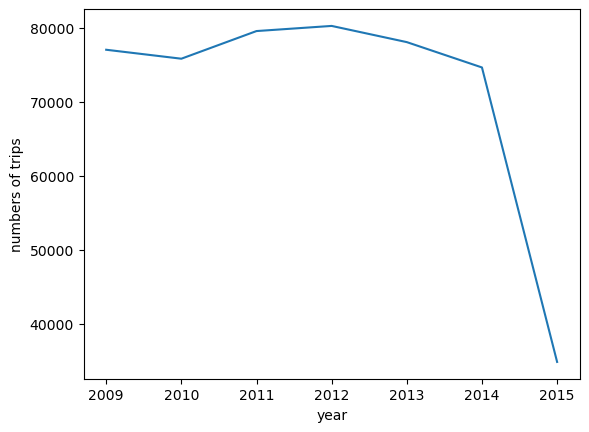

In [7]:
df = data.groupby("year")["key"].count()
sns.lineplot(x=df.index , y = df)
plt.ylabel("numbers of trips")
plt.show()

In [8]:
data["pickup_datetime"] =pd.to_datetime( data["pickup_datetime"] )
data["pickup_datetime"].dtype

dtype('<M8[ns]')

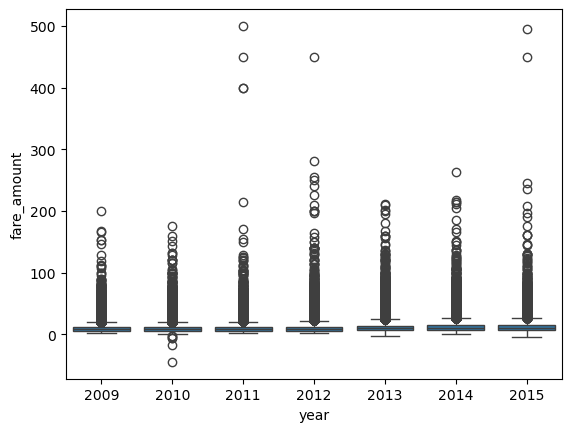

In [9]:
sns.boxplot(x=data["year"] , y = data["fare_amount"])
plt.show()

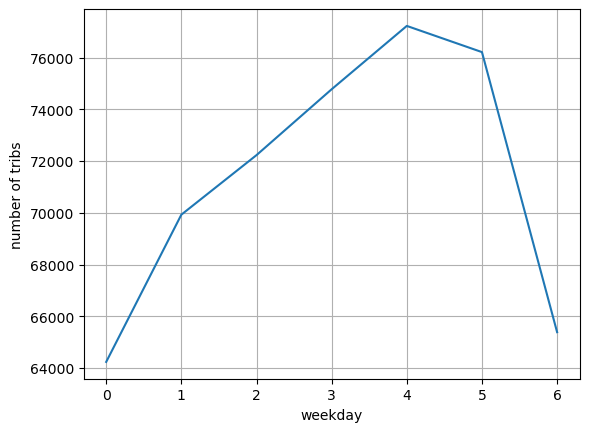

In [10]:
df = data.groupby("weekday")["key"].count()
sns.lineplot(x=df.index , y = df)
plt.grid(True)
plt.ylabel("number of tribs")
plt.show()

In [11]:
df = data.groupby("year").agg({"fare_amount":"sum" , "distance":"sum" })
df

,fare_amount,distance
year,,
2009,771444.93,4.767729e+05
2010,772900.36,5.453442e+05
2011,833571.28,1.423847e+06
2012,895079.55,2.082933e+06
2013,985215.92,1.310487e+06
2014,967305.01,2.572844e+06
2015,453517.20,1.322061e+06


In [12]:
df["fa/dis"] = df["fare_amount"] / df["distance"]
df

,fare_amount,distance,fa/dis
year,,,
2009,771444.93,4.767729e+05,1.618055
2010,772900.36,5.453442e+05,1.417271
2011,833571.28,1.423847e+06,0.585436
2012,895079.55,2.082933e+06,0.429721
2013,985215.92,1.310487e+06,0.751794
2014,967305.01,2.572844e+06,0.375967
2015,453517.20,1.322061e+06,0.343038


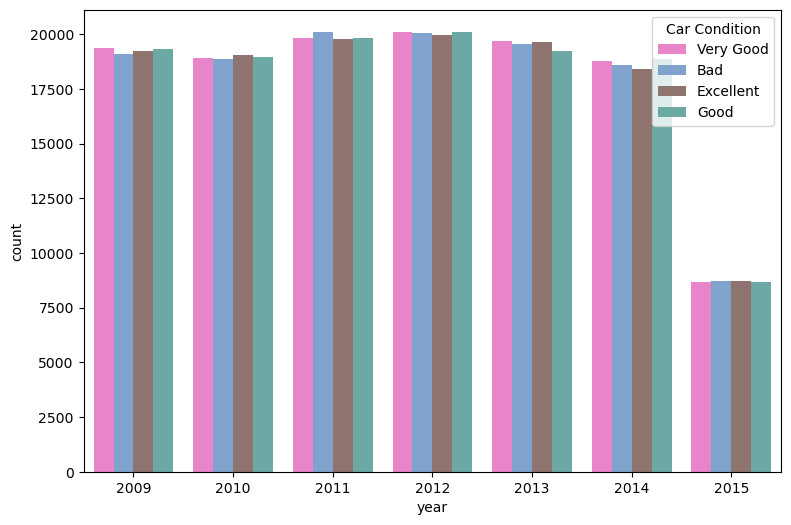

In [13]:
plt.figure(figsize=(9,6))
sns.countplot(data=data ,x = "year" , hue = "Car Condition", palette=["#f873d1", "#72a2da", "#946f6a","#62B2AD"])
plt.show()

In [14]:

df = data.groupby( "hour")["key"].count().reset_index()
df

,hour,key
0,0,19650
1,1,14556
2,2,10884
3,3,7936
4,4,5864
5,5,4982
6,6,10326
7,7,18231
8,8,22599
9,9,23565


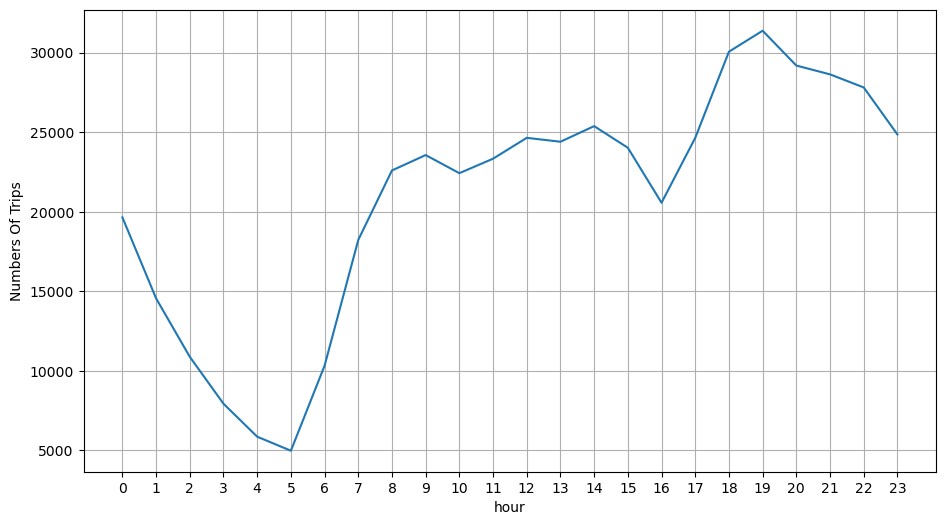

In [15]:
plt.figure(figsize=(11,6))
sns.lineplot(data= df , x = "hour" , y = "key")
plt.ylabel("Numbers Of Trips")
plt.xticks(df.index)
plt.grid(True)
plt.show()

In [16]:
df = data.groupby("Traffic Condition").agg({"fare_amount":"sum" , "distance":"sum" })
df["fa/dis"] = df["fare_amount"] / df["distance"]
df["fa/dis"]

Traffic Condition
Congested Traffic    0.568255
Dense Traffic        0.606616
Flow Traffic         0.576739
Name: fa/dis, dtype: float64

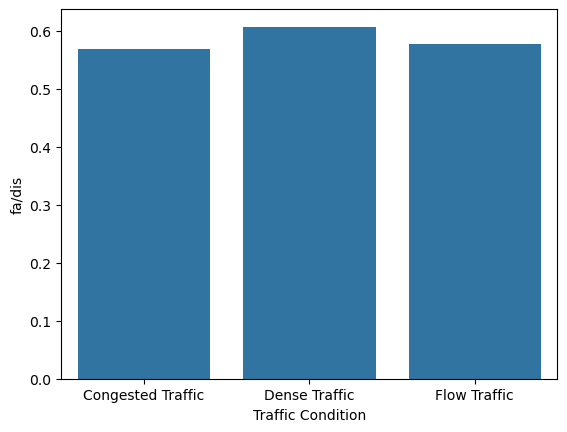

In [17]:
sns.barplot( x=df.index , y = df["fa/dis"])
plt.show() 

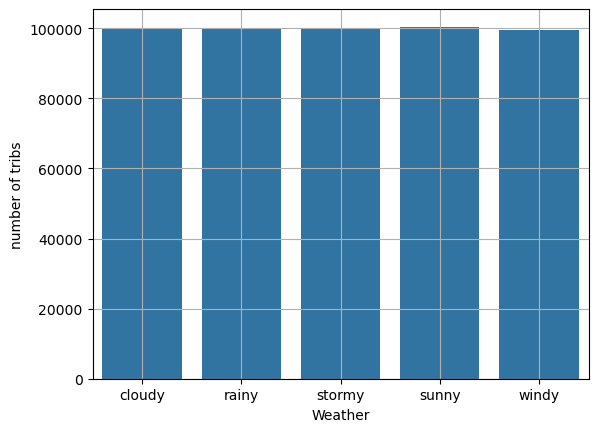

In [18]:
df = data.groupby("Weather")["key"].count()
sns.barplot(x=df.index , y = df)
plt.grid(True)
plt.ylabel("number of tribs")
plt.show()

# Modling

In [19]:
data["distance"] = data["distance"].abs()
data["fare_amount"] = data["fare_amount"].abs()
df = data[(data["fare_amount"] <= 0)  | (data["distance"] <= 0)]
data.drop(df.index, axis=0 , inplace= True)
data

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


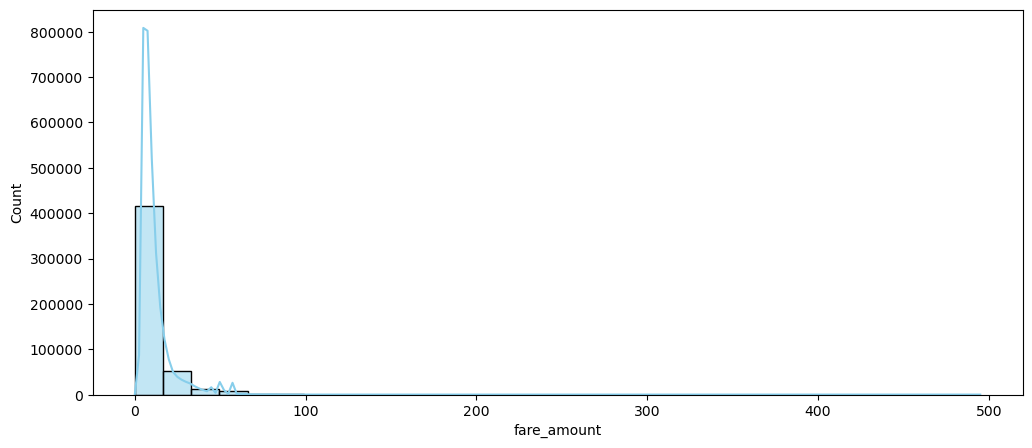

In [20]:
plt.figure(figsize=(12, 5))
sns.histplot(data["fare_amount"], kde=True, bins=30, color='skyblue')
plt.show()

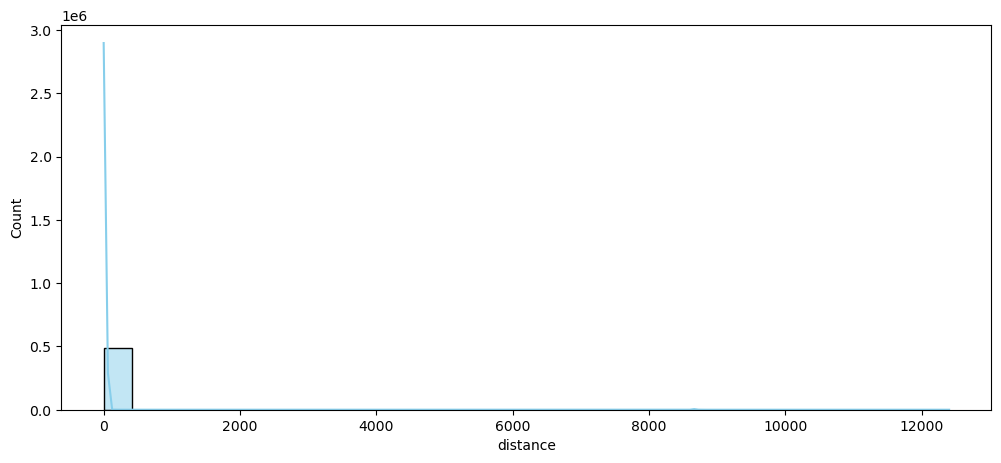

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(data["distance"], kde=True, bins=30, color='skyblue')
plt.show()

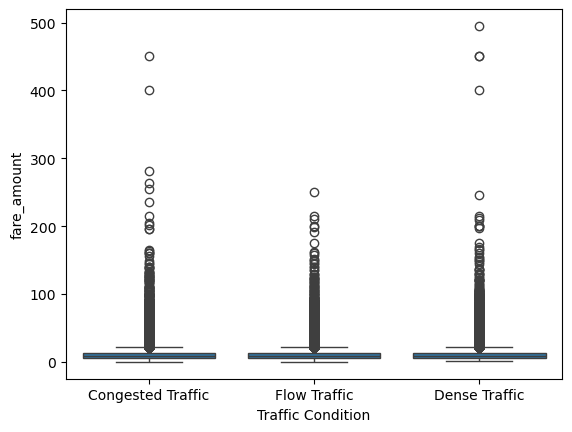

In [22]:
sns.boxplot(data=data , x="Traffic Condition" , y = "fare_amount")
plt.show()

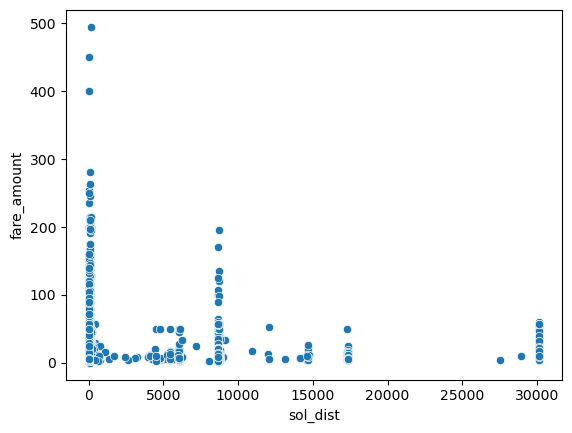

In [23]:
sns.scatterplot(data= data ,x='sol_dist' , y= 'fare_amount')
plt.show()

In [24]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [25]:
data.drop(columns=['User ID', 'User Name', 'Driver Name', "key" , "jfk_dist"	,"ewr_dist",	"lga_dist"	,"sol_dist"	,"nyc_dist" , "bearing" , "pickup_datetime", "pickup_longitude" ,	"pickup_latitude","dropoff_longitude",	"dropoff_latitude"  ] , inplace= True)
data

,Car Condition,Weather,Traffic Condition,fare_amount,passenger_count,hour,day,month,weekday,year,distance
0,Very Good,windy,Congested Traffic,4.5,1,17,15,6,0,2009,1.030764
1,Excellent,cloudy,Flow Traffic,16.9,1,16,5,1,1,2010,8.450134
2,Bad,stormy,Congested Traffic,5.7,2,0,18,8,3,2011,1.389525
3,Very Good,stormy,Flow Traffic,7.7,1,4,21,4,5,2012,2.799270
4,Bad,stormy,Congested Traffic,5.3,1,7,9,3,1,2010,1.999157
...,...,...,...,...,...,...,...,...,...,...,...
499995,Bad,rainy,Dense Traffic,7.0,1,18,7,5,3,2015,1.404709
499996,Very Good,rainy,Flow Traffic,13.7,1,12,13,9,0,2010,0.994184
499997,Bad,rainy,Flow Traffic,25.0,1,0,25,8,0,2014,7.859324
499998,Good,stormy,Congested Traffic,6.5,6,12,12,1,0,2015,0.994470


In [26]:
df = data.groupby("Traffic Condition").agg({"fare_amount":"sum" , "distance":"sum" })
df["fa/dis"] = df["fare_amount"] / df["distance"]
df

,fare_amount,distance,fa/dis
Traffic Condition,,,
Congested Traffic,1846609.26,3.344392e+06,0.552151
Dense Traffic,1836950.68,3.121607e+06,0.588463
Flow Traffic,1831309.84,3.268285e+06,0.560327


In [27]:
df = data.groupby("Car Condition").agg({"fare_amount":"sum" , "distance":"sum" })
df["fa/dis"] = df["fare_amount"] / df["distance"]
df

,fare_amount,distance,fa/dis
Car Condition,,,
Bad,1374389.05,2.489040e+06,0.552176
Excellent,1375886.10,2.402329e+06,0.572730
Good,1376330.43,2.289424e+06,0.601169
Very Good,1388264.20,2.553491e+06,0.543673


In [28]:
df = data.groupby("Weather").agg({"fare_amount":"sum" , "distance":"sum" })
df["fa/dis"] = df["fare_amount"] / df["distance"]
df

,fare_amount,distance,fa/dis
Weather,,,
cloudy,1103449.35,2.057617e+06,0.536275
rainy,1103126.67,1.922935e+06,0.573668
stormy,1101705.84,1.954057e+06,0.563804
sunny,1109122.28,2.098330e+06,0.528574
windy,1097465.64,1.701344e+06,0.645058


In [29]:
encode = OneHotEncoder(sparse_output = False)
data = data.reset_index(drop=True)
df =  encode.fit_transform(data[["Traffic Condition"]])
df = pd.DataFrame(data=df , columns=data["Traffic Condition"].unique())
data = pd.concat([data, df] , axis= 1)
data.drop(columns=["Traffic Condition"] , axis= 1, inplace= True) 
data

,Car Condition,Weather,fare_amount,passenger_count,hour,day,month,weekday,year,distance,Congested Traffic,Flow Traffic,Dense Traffic
0,Very Good,windy,4.5,1,17,15,6,0,2009,1.030764,1.0,0.0,0.0
1,Excellent,cloudy,16.9,1,16,5,1,1,2010,8.450134,0.0,0.0,1.0
2,Bad,stormy,5.7,2,0,18,8,3,2011,1.389525,1.0,0.0,0.0
3,Very Good,stormy,7.7,1,4,21,4,5,2012,2.799270,0.0,0.0,1.0
4,Bad,stormy,5.3,1,7,9,3,1,2010,1.999157,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485729,Bad,rainy,7.0,1,18,7,5,3,2015,1.404709,0.0,1.0,0.0
485730,Very Good,rainy,13.7,1,12,13,9,0,2010,0.994184,0.0,0.0,1.0
485731,Bad,rainy,25.0,1,0,25,8,0,2014,7.859324,0.0,0.0,1.0
485732,Good,stormy,6.5,6,12,12,1,0,2015,0.994470,1.0,0.0,0.0


In [30]:
data.replace({"cloudy" : 2 , "sunny" : 1 , "stormy" : 3 , "rainy" : 4 , "windy" : 5} , inplace=True)
data.replace({"Very Good":1 , "Bad" : 2 , "Excellent" : 3 , "Good" : 4} , inplace= True )
data

C:\Users\karem\AppData\Local\Temp\ipykernel_16432\1263230610.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"cloudy" : 2 , "sunny" : 1 , "stormy" : 3 , "rainy" : 4 , "windy" : 5} , inplace=True)
C:\Users\karem\AppData\Local\Temp\ipykernel_16432\1263230610.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Very Good":1 , "Bad" : 2 , "Excellent" : 3 , "Good" : 4} , inplace= True )


,Car Condition,Weather,fare_amount,passenger_count,hour,day,month,weekday,year,distance,Congested Traffic,Flow Traffic,Dense Traffic
0,1,5,4.5,1,17,15,6,0,2009,1.030764,1.0,0.0,0.0
1,3,2,16.9,1,16,5,1,1,2010,8.450134,0.0,0.0,1.0
2,2,3,5.7,2,0,18,8,3,2011,1.389525,1.0,0.0,0.0
3,1,3,7.7,1,4,21,4,5,2012,2.799270,0.0,0.0,1.0
4,2,3,5.3,1,7,9,3,1,2010,1.999157,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485729,2,4,7.0,1,18,7,5,3,2015,1.404709,0.0,1.0,0.0
485730,1,4,13.7,1,12,13,9,0,2010,0.994184,0.0,0.0,1.0
485731,2,4,25.0,1,0,25,8,0,2014,7.859324,0.0,0.0,1.0
485732,4,3,6.5,6,12,12,1,0,2015,0.994470,1.0,0.0,0.0


In [31]:
data.dtypes

Car Condition          int64
Weather                int64
fare_amount          float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
weekday                int64
year                   int64
distance             float64
Congested Traffic    float64
Flow Traffic         float64
Dense Traffic        float64
dtype: object

In [32]:
data["fa/dis"] = data["fare_amount"] / data["distance"]
data['z_score'] = zscore(data['fa/dis'])
outliers = data[abs(data['z_score']) > 3]
outliers

,Car Condition,Weather,fare_amount,passenger_count,hour,day,month,weekday,year,distance,Congested Traffic,Flow Traffic,Dense Traffic,fa/dis,z_score
493,1,4,49.57,2,18,23,10,5,2010,0.000279,1.0,0.0,0.0,177567.365627,30.445448
1449,2,2,70.00,1,14,1,9,1,2009,0.002733,1.0,0.0,0.0,25611.673049,4.376288
4724,2,1,49.80,1,11,5,2,6,2012,0.000848,0.0,0.0,1.0,58714.316932,10.055300
8487,4,2,52.00,1,1,19,12,3,2013,0.002616,0.0,0.0,1.0,19878.394506,3.392701
10309,3,2,58.00,1,1,27,2,3,2014,0.001960,0.0,0.0,1.0,29597.662918,5.060115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480627,1,3,57.33,1,19,13,4,6,2014,0.000111,0.0,0.0,1.0,515581.077914,88.434283
484714,1,1,52.00,1,13,29,1,2,2014,0.000279,0.0,1.0,0.0,186440.382946,31.967682
485038,4,3,45.00,1,17,30,3,0,2009,0.000611,0.0,1.0,0.0,73677.690627,12.622381
485109,1,5,45.00,5,12,26,12,5,2009,0.000752,0.0,0.0,1.0,59847.104058,10.249638


In [33]:
data.drop(outliers.index , axis= 0 , inplace = True)
data.drop(columns=["fa/dis"	,"z_score"] , axis= 1 , inplace= True)
data

,Car Condition,Weather,fare_amount,passenger_count,hour,day,month,weekday,year,distance,Congested Traffic,Flow Traffic,Dense Traffic
0,1,5,4.5,1,17,15,6,0,2009,1.030764,1.0,0.0,0.0
1,3,2,16.9,1,16,5,1,1,2010,8.450134,0.0,0.0,1.0
2,2,3,5.7,2,0,18,8,3,2011,1.389525,1.0,0.0,0.0
3,1,3,7.7,1,4,21,4,5,2012,2.799270,0.0,0.0,1.0
4,2,3,5.3,1,7,9,3,1,2010,1.999157,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485729,2,4,7.0,1,18,7,5,3,2015,1.404709,0.0,1.0,0.0
485730,1,4,13.7,1,12,13,9,0,2010,0.994184,0.0,0.0,1.0
485731,2,4,25.0,1,0,25,8,0,2014,7.859324,0.0,0.0,1.0
485732,4,3,6.5,6,12,12,1,0,2015,0.994470,1.0,0.0,0.0


In [34]:
scaler = RobustScaler()
data["distance"] = scaler.fit_transform( data[["distance"]]) 
data

,Car Condition,Weather,fare_amount,passenger_count,hour,day,month,weekday,year,distance,Congested Traffic,Flow Traffic,Dense Traffic
0,1,5,4.5,1,17,15,6,0,2009,-0.428028,1.0,0.0,0.0
1,3,2,16.9,1,16,5,1,1,2010,2.325056,0.0,0.0,1.0
2,2,3,5.7,2,0,18,8,3,2011,-0.294903,1.0,0.0,0.0
3,1,3,7.7,1,4,21,4,5,2012,0.228207,0.0,0.0,1.0
4,2,3,5.3,1,7,9,3,1,2010,-0.068689,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485729,2,4,7.0,1,18,7,5,3,2015,-0.289269,0.0,1.0,0.0
485730,1,4,13.7,1,12,13,9,0,2010,-0.441601,0.0,0.0,1.0
485731,2,4,25.0,1,0,25,8,0,2014,2.105826,0.0,0.0,1.0
485732,4,3,6.5,6,12,12,1,0,2015,-0.441495,1.0,0.0,0.0


In [35]:
y = data["fare_amount"]
X = data.drop("fare_amount", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model =  RandomForestRegressor(n_estimators=300, max_depth=12, n_jobs=3)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=300, n_jobs=3)

In [60]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 17.843855685854102
R²: 0.809714563826672


In [63]:
poly_reg= PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)

lin_reg2.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = lin_reg2.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 92.17705351674329
R²: 0.017031344435795237
